<a href="https://colab.research.google.com/github/doliq/PCVK/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [4]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [5]:
  img_m = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpeg')
  img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
  img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

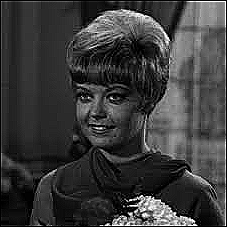

In [6]:
#sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

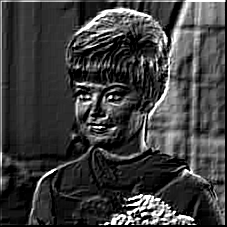

In [7]:
#embos
kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

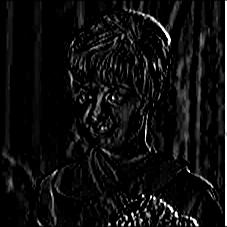

In [8]:
#left Sobel Edge Detection
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

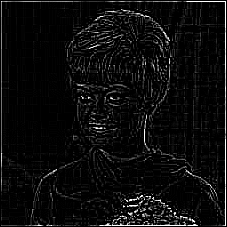

In [14]:
# Canny edge Detection
kernel_canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))


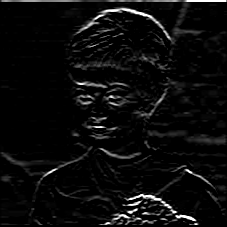

In [10]:
#Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

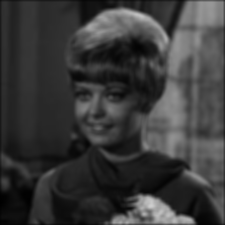

In [11]:
# =5x5 Gaussian Bluar
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

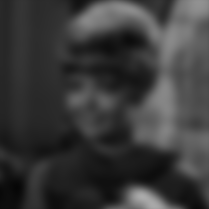

In [13]:
#21x21 Gaussian blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# **Tugas**
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [19]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Tentukan path folder
folder_path = '/content/drive/MyDrive/PCVK/Images/KTP.jpeg'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Inisialisasi daftar untuk menyimpan citra-citra
img_list_before = []  # Citra sebelum operasi
img_list_after = []   # Citra setelah operasi

# Load dataset KTP dan terapkan perbaikan
for img_file in ktp_files:
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    if img is not None:
        # Simpan citra sebelum operasi
        img_list_before.append(img.copy())

        # Terapkan sharpening (mengganti Gaussian blur)
        kernel = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])
        img_sharpened = cv2.filter2D(img, -1, kernel)

        # Terapkan deteksi (misalnya, Edge detection dengan Canny)
        img_edges = cv2.Canny(img_sharpened, 100, 200)

        # Terapkan konversi ke grayscale
        img_grayscale = cv2.cvtColor(img_sharpened, cv2.COLOR_BGR2GRAY)

        # Terapkan histogram equalization
        img_equalized = cv2.equalizeHist(img_grayscale)

        # Terapkan operasi aritmatika (misalnya, peningkatan kontras dan kecerahan)
        alpha = 1.5
        beta = 30
        img_corrected = cv2.convertScaleAbs(img_equalized, alpha=alpha, beta=beta)

        # Simpan citra setelah operasi
        img_list_after.append(img_corrected)

# Tampilkan citra sebelum dan sesudah operasi
for img_before, img_after in zip(img_list_before, img_list_after):
    if img_before is not None and img_after is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
        plt.title("gambar asli")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img_after, cmap="gray")
        plt.axis('off')

        plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NotADirectoryError: ignored